- Order : Droping Time, checking for NaN and 0, Rescale "Amount", Droping "outliers"

- Rescaling the data in 2 different ways: 

- Downsample even more and upsample by copying the minority class

-  Using SMOTE-function from imbalanced-learn, Synthetic Minority Over-sampling

## About the Dataset - Credit Card Fraud Detection 

Today, purchases through credit & debit card is the main way of making transactions for a majority of people.  As we are moving more towards the digital world everyday, cybersecurity is becoming a crucial part of our life. We thought analysing a dataset focusing on credit card fraud would be interesting. In this analysis we will be focusing on cleaning the data and the classification and clustering data-mining techniques 

The dataset that we plan to use contains credit card transactions made in September 2013 by European cardholders. The transactions from this dataset are labeled as either fraudulent or non fraudulent and this will help train our machine learning models  This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 

Link to Dataset - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Part I - Data Preprocessing 

Before we can use our dataset we must perform data pre-processing. Data-preprocessing is important for removing missing or inconsistent data resulting from human or computer error e.g duplicates or random data that makes no sense (noise). Data-preprocessing can help improve the accuracy and quality of our dataset and thus make it significantly more reliable and consistent. 

Before we begin we will import all the necessary libraries to have them all in one place, so we can modify them quickly. This will make the task at hand easier for us to understand.  For the first part of the cleaning we are dropping the time variable which can be an external deciding factor. We are also adding all of our imports to for the machine learning model. We used the pandas module to import our dataset


In [36]:
# https://stackoverflow.com/questions/50276911/how-to-split-data-by-different-classes-in-python-3-6
# https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from termcolor import colored as cl
from pandas import Series, DataFrame
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
df = pd.read_csv('archive.zip') # Importing our dataset 

We also observed in our data 28 features that are transformed versions of PCA but the amount is the original one. While observing the minimum and maximum is in the amount - we observed a huge difference that can deviate our result

In [37]:
df.Amount.min(), df.Amount.max()
minmax = [df.min(axis = 0),df.max(axis = 0)]
minmax

[Time        0.000000
 V1        -56.407510
 V2        -72.715728
 V3        -48.325589
 V4         -5.683171
 V5       -113.743307
 V6        -26.160506
 V7        -43.557242
 V8        -73.216718
 V9        -13.434066
 V10       -24.588262
 V11        -4.797473
 V12       -18.683715
 V13        -5.791881
 V14       -19.214325
 V15        -4.498945
 V16       -14.129855
 V17       -25.162799
 V18        -9.498746
 V19        -7.213527
 V20       -54.497720
 V21       -34.830382
 V22       -10.933144
 V23       -44.807735
 V24        -2.836627
 V25       -10.295397
 V26        -2.604551
 V27       -22.565679
 V28       -15.430084
 Amount      0.000000
 Class       0.000000
 dtype: float64,
 Time      172792.000000
 V1             2.454930
 V2            22.057729
 V3             9.382558
 V4            16.875344
 V5            34.801666
 V6            73.301626
 V7           120.589494
 V8            20.007208
 V9            15.594995
 V10           23.745136
 V11           12.018913
 

Thus we decided to scale this variable as we thought it was good practice. We used a standard scale to make it fix. As mentioned above we dropped the time value as it can be an external deciding factor 

In [38]:
sc = StandardScaler()
amount = df['Amount'].values 
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

Next, will check for duplicates. Before removing any duplicate transactions found in the dataset we observed that we had a grand total of 284807 transactions. During the cleaning process we observed the changes and came to the conclusion that the dataset consisted of 283726 transactions after removing the duplicates. Removing the duplicates is important because it helps us to scale the dataset. 

We have one more variable which is the time which can be an external deciding factor — but in our modelling process, we can drop it, so we decided to drop the time column during the cleaning process

In [39]:
print(f'Number of transactions: {len(df)}')
print(f'Number of duplicates: {df.duplicated().sum()}')

df = df.drop_duplicates()
print(f'Number of transactions after dropping duplicated: {len(df)}')

df = df.drop(columns = 'Time') #Dropping time after checking duplicates

Number of transactions: 284807
Number of duplicates: 1081
Number of transactions after dropping duplicated: 283726


We created a box plot to investigate if there was any outliers within the dataset and our result was that the box plot showered there was quite a few outliers and we decided to drop all outliers that were outside q3 + 1.5iqr and below q1-1.5qr. 

These are the results we got. 

<AxesSubplot: >

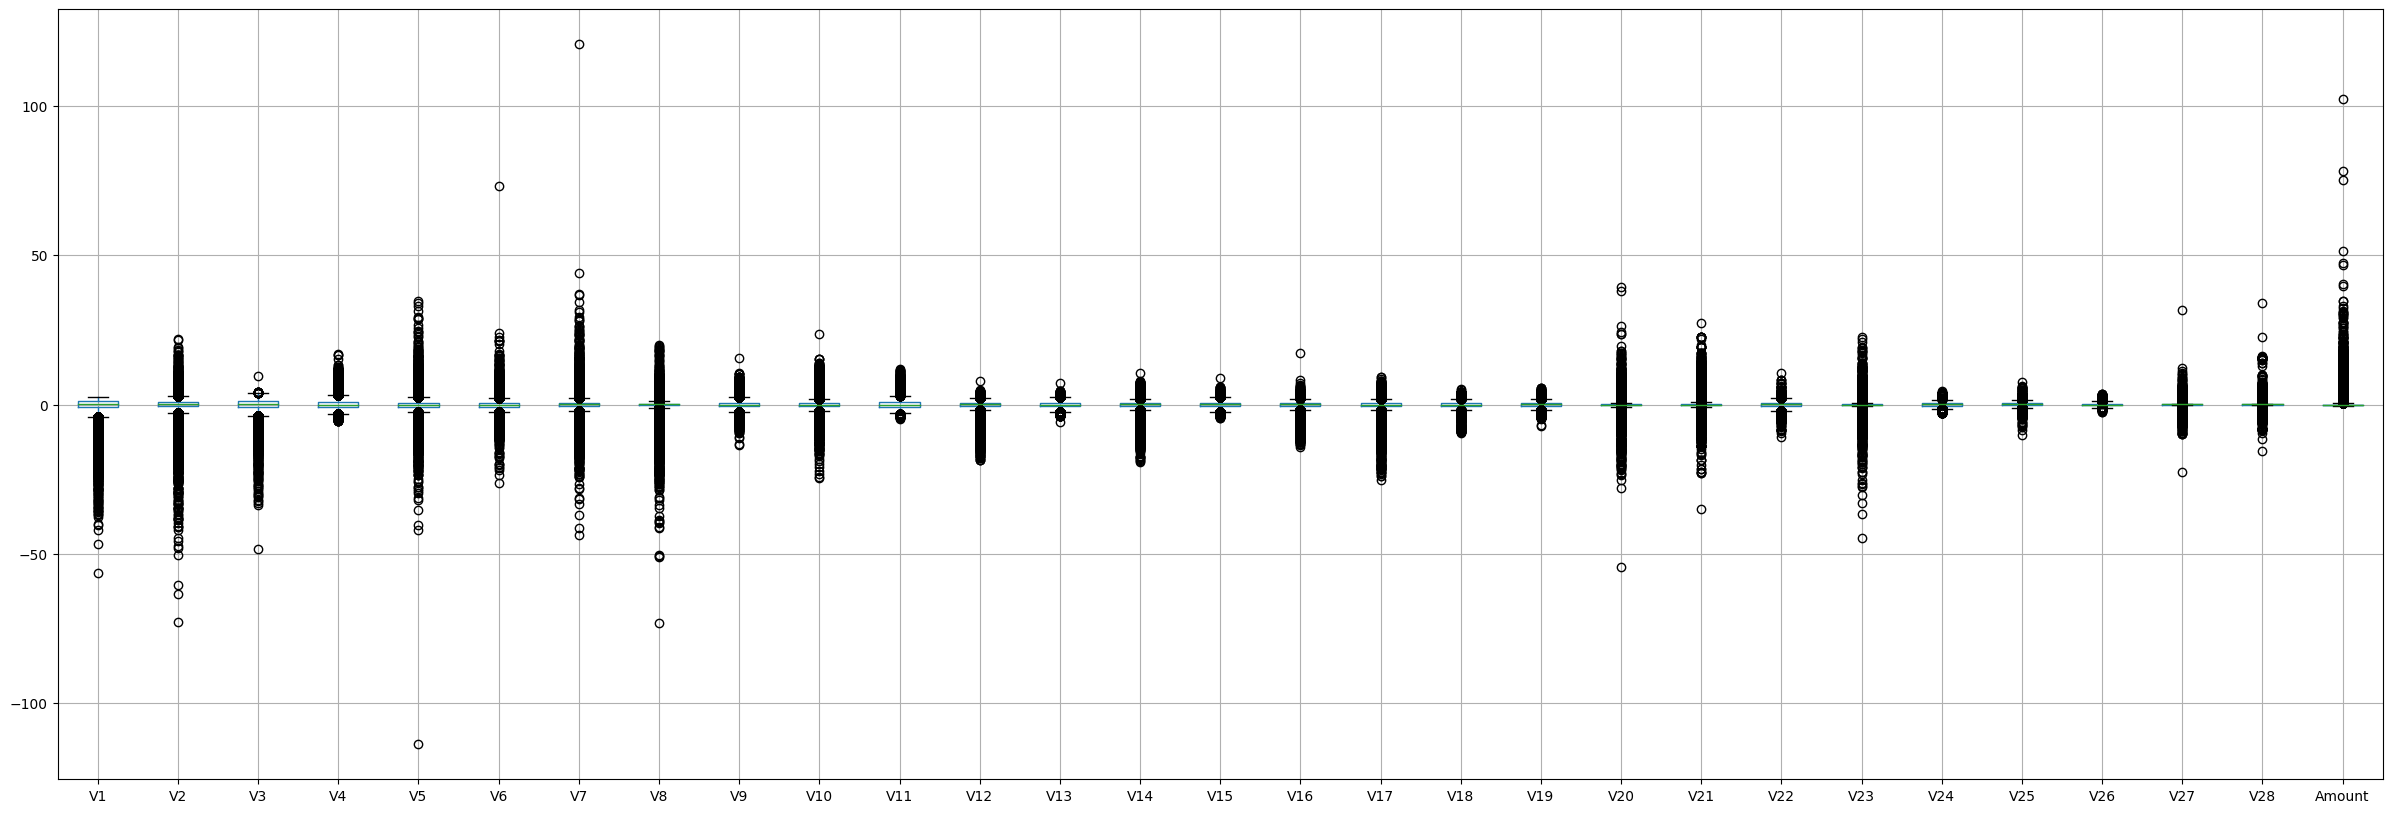

In [40]:
%matplotlib inline
data2 = df.drop(['Class'],axis=1)
data2['V1'] = pd.to_numeric(data2['V1'])
data2.boxplot(figsize=(30,10))

We can see that there exists alot of outlier. We decided to calculate Q1 and Q3 using the whole data set, but only drop outliers in the 0 class. If we dropped outliers in class 1, the data will only contain 17 frauds out of 146000 transactions. 

In [44]:
 # Deletes outliers, only in class 0, otherwise to many points of the minority class would be droped
by_class = df.groupby('Class')
tmp_0 = pd.DataFrame(by_class.get_group(0))
tmp_1 = pd.DataFrame(by_class.get_group(1))
for x in df.columns[0:-1]:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    tmp_0.loc[tmp_0[x] < min,x] = np.nan
    tmp_0.loc[tmp_0[x] > max,x] = np.nan
    a = len(df)
    df = pd.concat([tmp_0.iloc[:], tmp_1.iloc[:]])
    b = len(df)
    n_downsampled = a-b
df = df.dropna()
check_for_0 = df.drop(['Class'],axis=1)
n_datapoints = len(df)
print(f'Are there any 0 values in the data? {0 in check_for_0}')
print(f'New number of transactions: {n_datapoints}')

Are there any 0 values in the data? False
New number of transactions: 91188


We took a new look at the box plot and observed the values were a lot lower. As we got a new q1 and q3 we can see that there is still some outliers within the dataset but these are assumed to be part of class 1 and since we deleted outlier from class zero as we had too many too datapoints, remove outliers and balanced the dataset. The new dataset contains only half of the original data points. 

<AxesSubplot: >

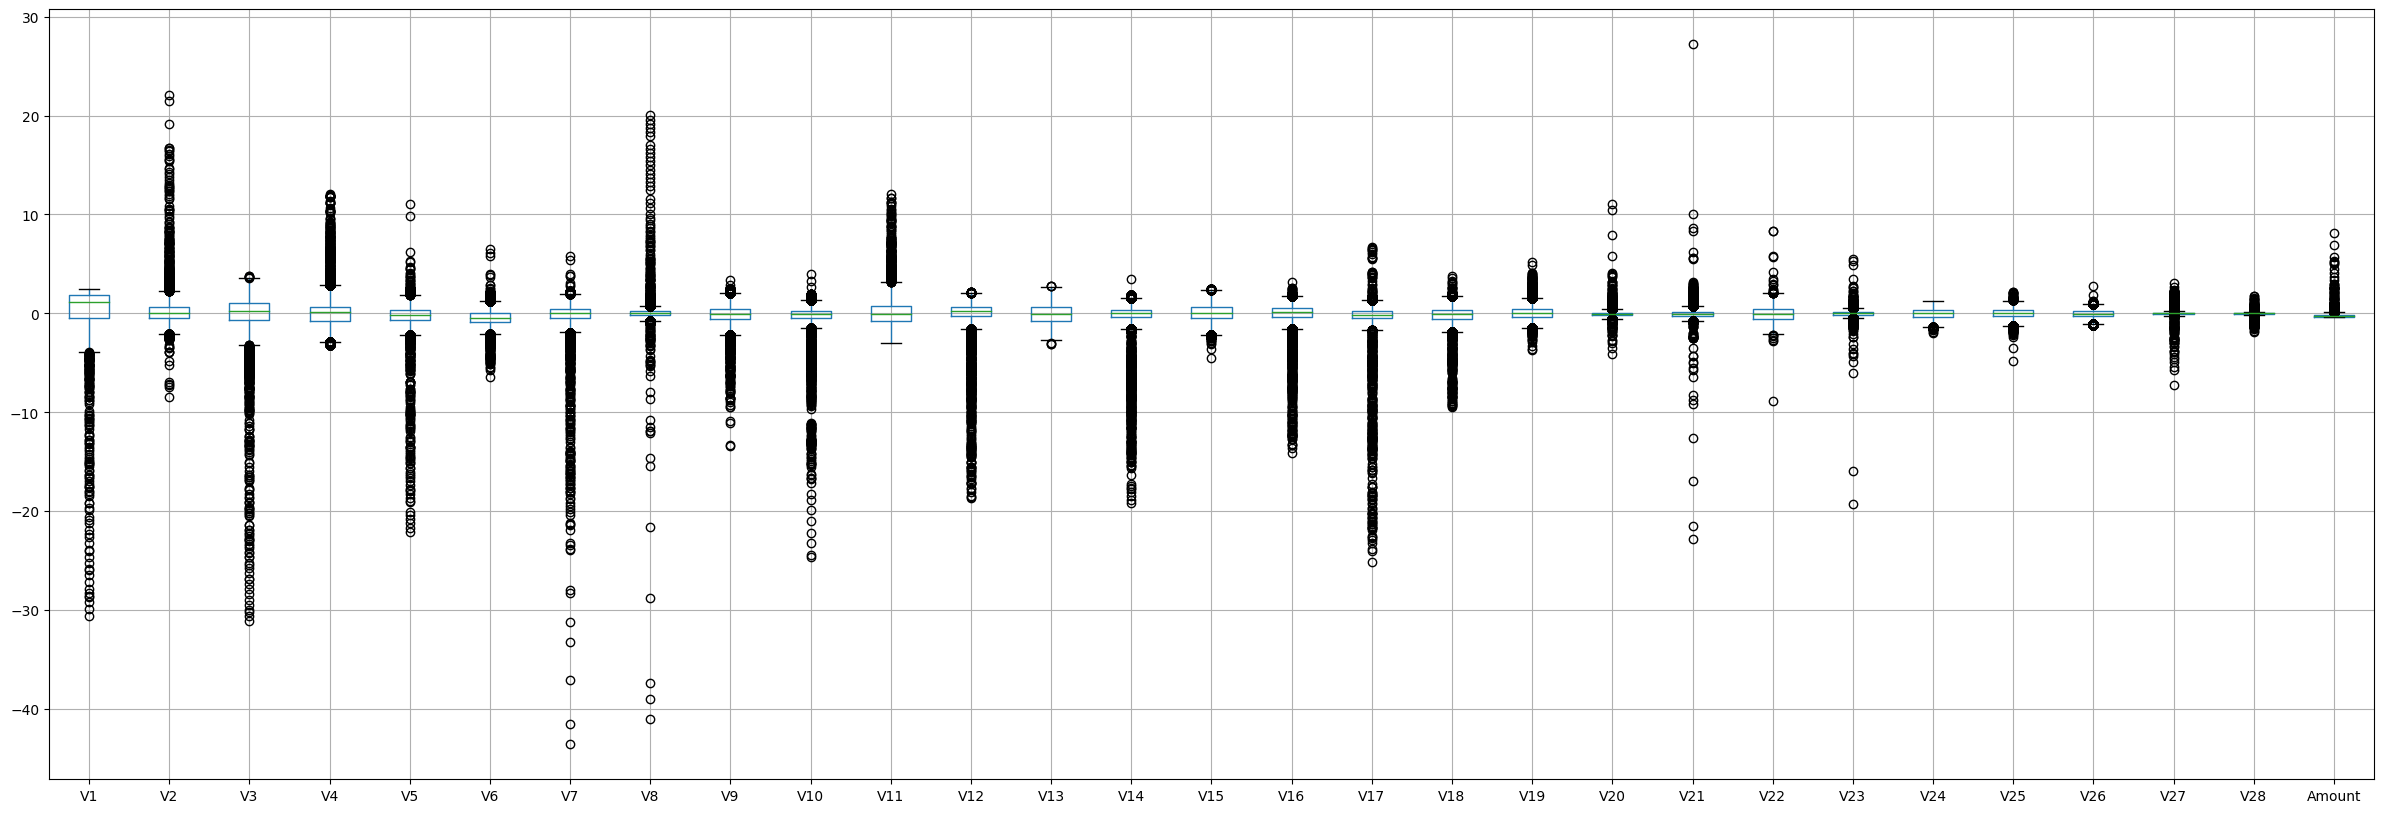

In [42]:
%matplotlib inline
data2 = df.drop(['Class'],axis=1)
data2['V1'] = pd.to_numeric(data2['V1'])
data2.boxplot(figsize=(30,10))


In [ ]:
minmax = [df.min(axis = 0),df.max(axis = 0)]
minmax

[V1       -30.552380
 V2        -8.402154
 V3       -31.103685
 V4        -3.234792
 V5       -22.105532
 V6        -6.406267
 V7       -43.557242
 V8       -41.044261
 V9       -13.434066
 V10      -24.588262
 V11       -2.988333
 V12      -18.683715
 V13       -3.127795
 V14      -19.214325
 V15       -4.498945
 V16      -14.129855
 V17      -25.162799
 V18       -9.498746
 V19       -3.681904
 V20       -4.128186
 V21      -22.797604
 V22       -8.887017
 V23      -19.254328
 V24       -2.028024
 V25       -4.781606
 V26       -1.176759
 V27       -7.263482
 V28       -1.869290
 Amount    -0.353229
 Class      0.000000
 dtype: float64,
 V1         2.454930
 V2        22.057729
 V3         3.790995
 V4        12.114672
 V5        11.095089
 V6         6.474115
 V7         5.802537
 V8        20.007208
 V9         3.353525
 V10        4.031435
 V11       12.018913
 V12        2.151044
 V13        2.815440
 V14        3.442422
 V15        2.497402
 V16        3.139656
 V17        6.739

We decided to handle the remaining data in two different ways, creating two new data sets which we are comparing the clustering and classification results for. Only one of the sampeling strategy should be run!

# Only one of the sampeling strategy should be run!

### First data set

Before splitting train & test — we needed to define dependent and independent variables. The dependent variable is also known as X and the independent variable is known as y. We included other techniques such as downsampling and upsampling for more accurate results. We Upsampled the minority class and downsampled the majority class, we also split and trained the data . We still ended up with unbalanced data but the minority class is being upsampled after splitting the data, which means that the test set contains data thats never been seen before.

In [ ]:
# 1 way of handeling the data. 
# Upsampling the minority class, downsampling the majority class, splitting the data. Still unbalanced data
# The minority class is being upsampled after splitting the data, which means that the test set contains
# data thats never been seen before
def split_dataset(df, split_size=0.8, downsample = True, frac_downsample = 0.2, upsample = True, frac_upsample = 0.5):
    
    n_downsampled = 0
    n_upsampled = 0
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    by_class = df.groupby('Class')
    
    if downsample:
        # Deletes % of the majority class
        a = len(df)
        df = df.drop(df[df['Class'] == 0].sample(frac=frac_downsample).index) 
        b = len(df)
        n_downsampled = a-b


    sampled_df = df
    c = int(0.8*len(by_class.get_group(0)))
    df_train = df_train.append(by_class.get_group(0).iloc[0:c])
    df_test = df_test.append(by_class.get_group(0).iloc[c:])
    c = int(0.8*len(by_class.get_group(1)))
    df_train = df_train.append(by_class.get_group(1).iloc[0:c])
    df_test = df_test.append(by_class.get_group(1).iloc[c:])

    by_class2 = df_train.groupby('Class')
    if upsample: 
        #upsampling the minority class with given%
        df_minority = resample(by_class2.get_group(1), replace=True, n_samples=int(len(by_class2.get_group(1))*frac_upsample))
        df_train = pd.concat([df_train, df_minority])
        n_upsampled = len(df_minority)

    
    

    return df_train, df_test, sampled_df, n_upsampled, n_downsampled

df_train, df_test, sampled_df, n_upsampled, n_downsampled = split_dataset(df, downsample = True, frac_downsample = 0.5, upsample = True, frac_upsample = 5 )


After splitting and training our dataset we decided to check the transaction distribution without sampling. We downsampled a total of 72969 transactions and upsampled a total of 1890 fraudulent transactions. However we felt it would be good practice to observe results without any sampling in place. Without downsampling and upsampling we discovered that only 0.32% of the transactions within this dataset were classified as "fraudulent" but after sampling we identifed that figure jumped to a total of 1.32% of fraudulent transactions within the dataset. There was a number of 473 fraud transaction within our dataset without sampling.  


In [ ]:
Total_transactions = len(df)
normal = len(df[df.Class == 0])
fraudulent = len(df[df.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
fraud_percentage2 = round((fraudulent+n_upsampled)/normal*100,2)
print(cl('Total number of Transactions without sampling are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions without sampling are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions without sampling are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraudulent Transactions without sampling is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('Number of transactions downsampled {}'.format(n_downsampled), attrs = ['bold']))
print(cl('Number of frauds transactions upsampled {}'.format(n_upsampled), attrs = ['bold']))
print(cl('Percentage of fraudulent Transactions after upsampling is {}'.format(fraud_percentage2), attrs = ['bold']))

Total number of Transactions without sampling are 146411
Number of Normal Transactions without sampling are 145938
Number of fraudulent Transactions without sampling are 473
Percentage of fraudulent Transactions without sampling is 0.32
Number of transactions downsampled 72969
Number of frauds transactions upsampled 1890
Percentage of fraudulent Transactions after upsampling is 1.62


### Second data set

In this sampeling strategy, the function SMOTE from imblearn is being used. It creates synthetical data points for the minority class that reminds of allready existing points. The data will be balanced, but the synthetical data points might be one to many.  

In [ ]:
#!pip install imblearn
# second strategy for handeling the data set. 
from imblearn.over_sampling import SMOTE
# resample data with the function SMOTE. makes the data balanced. 
def smoot(df,frac_downsample = 0.5, downsample = False):

    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    by_class = df.groupby('Class')
    if downsample: 
        df = df.drop(df[df['Class'] == 0].sample(frac=frac_downsample).index) #downsamples

    frauds = len(df[df.Class == 1]) 
    df[df.columns[0:-1]],df[df.columns[-1]] = SMOTE().fit_resample(df[df.columns[0:-1]],df[df.columns[-1]])
    b = len(df[df.Class == 1])
    n_upsampled = b-frauds

    c = int(0.8*len(by_class.get_group(0)))
    df_train = df_train.append(by_class.get_group(0).iloc[0:c])
    df_test = df_test.append(by_class.get_group(0).iloc[c:])
    c = int(0.8*len(by_class.get_group(1)))
    df_train = df_train.append(by_class.get_group(1).iloc[0:c])
    df_test = df_test.append(by_class.get_group(1).iloc[c:])

    return df_train, df_test, df, n_upsampled, frauds

df_train, df_test, df, n_upsampled, frauds = smoot(df,frac_downsample = 0.5, downsample = False)
    

In [ ]:
Total_transactions = len(df)
normal = len(df[df.Class == 0])
fraudulent = len(df[df.Class == 1])
fraud_percentage = round(fraudulent/Total_transactions*100, 2)
fraud_percentage2 = round((fraudulent+n_upsampled)/normal*100,2)
print(cl('Total number of Transactions without sampling are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions without sampling are {}'.format(n_datapoints-frauds), attrs = ['bold']))
print(cl('Number of fraudulent Transactions without SMOTE are {}'.format(frauds), attrs = ['bold']))
print(cl('Percentage of fraudulent Transactions with SMOTE is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('Number of frauds transactions upsampled {}'.format(n_upsampled), attrs = ['bold']))
print(cl('Percentage of fraudulent Transactions after upsampling is {}'.format(fraud_percentage2), attrs = ['bold']))

Total number of Transactions without sampling are 146411
Number of Normal Transactions without sampling are 145938
Number of fraudulent Transactions without SMOTE are 473
Percentage of fraudulent Transactions with SMOTE is 46.37
Number of frauds transactions upsampled 67418
Percentage of fraudulent Transactions after upsampling is 172.32


## Part II - Classification

We decided for the second part of this analysis that we would focus on classification. We built different machine learning models one by one.These classifier models will be using the data we upsampled and downsampled. The three model we focused on were Decision Trees, Logistic Regression and K-Nearest Neighbours. We compared the three different machine learning classification models to each other and found the model with the strongest f1 score, accuracy, precision and recall. 

In [ ]:
# Our Classifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.metrics import confusion_matrix



#Metrics for classification
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score

The first machine learning model we decided to implement was decision tree. A decision tree is one of the supervised machine learning algorithms. This algorithm can be used for regression and classification problems — yet, is mostly used for classification problems. We calculated the f1 score, accuracy, precision and recall for the decision tree and we created a graph to compare the accuracy to the precision to the recall. We found the decision tree classifier had an accuracy of 0.999 for the first data set, and 0.997 for the second.  The AUC PRC scores were 0.906 and 0.996 respectivly. 

Accuracy for DT-classifier: 0.9996926544411433
Precision for DT-classifier: 0.9157894736842105
Recall for DT-classifier: 0.9886363636363636
F1-score for DT-classifier: 0.9508196721311476
0.9056559711719342


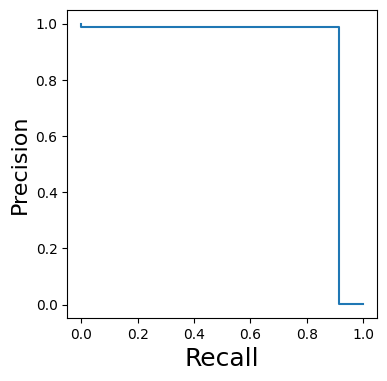

In [ ]:
# Decision Tree
DT = DecisionTreeClassifier(random_state=0)
DT.fit(df_train[df_train.columns[0:-1]],df_train[df_train.columns[-1]])
pred = DT.predict(df_test[df_test.columns[0:-1]])
#CrossValidation
#for score in ['accuracy', 'roc_auc']:
#    s = cross_val_score(DT, df[df.columns[0:-1]],df[df.columns[-1]], scoring = score, cv=2)
#    print(f'Model {score}, Mean = {s.mean()}, standard dev = {s.std()}')

y_score = DT.predict_proba(df_test[df_test.columns[0:-1]])[:,1]

precision, recall, _ = precision_recall_curve(df_test[df_test.columns[-1]],y_score)
auprc = average_precision_score(df_test[df_test.columns[-1]], y_score)

print(f'Accuracy for DT-classifier: {accuracy_score(pred,df_test[df_test.columns[-1]])}')
print(f'Precision for DT-classifier: {precision_score(pred,df_test[df_test.columns[-1]])}') 
print(f'Recall for DT-classifier: {recall_score(pred,df_test[df_test.columns[-1]])}') 
print(f'F1-score for DT-classifier: {f1_score(pred,df_test[df_test.columns[-1]])}')
print(auprc)

plt.figure(figsize=(4,4))
plt.step(recall, precision, where='post')
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=16)
plt.show()

We also checked the confusion matrix for the decision tree model. Here, the first row represents positive and the second row represents negative. So we have 29187 as true positive and 12 false positive positives and 83 classified as fraud. 

In [ ]:
confusion_matrix(df_test[df_test.columns[-1]], pred, labels = [0, 1])

array([[29187,     1],
       [    8,    87]])

Secondly we decided to implement the k nearest neighbour classifier. The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. We calculated the f1 score, accuracy, precision and recall for the k nearest neighbour and we created a graph to compare the accuracy to the precision to the recall. We found the decision tree classifier had an AUC PRC score of 0.863 and 0.999 for each data set. 

Accuracy for KNN-classifier: 0.9995560564149848
Precision for KNN-classifier: 0.8736842105263158
Recall for KNN-classifier: 0.9880952380952381
F1-score for KNN-classifier: 0.9273743016759777
0.8635691986139106


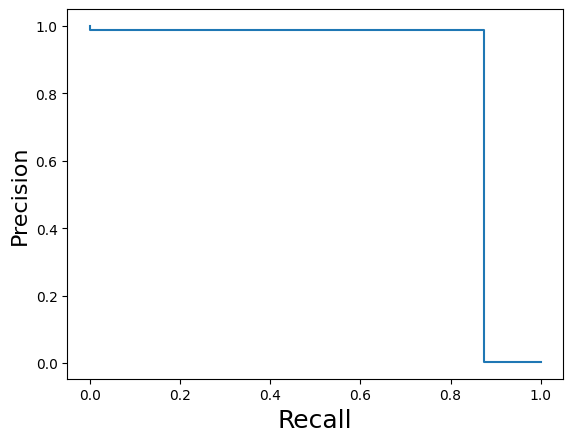

<Figure size 400x400 with 0 Axes>

In [ ]:
# KNN
knn = KNeighborsClassifier(5)
knn.fit(df_train[df_train.columns[0:-1]],df_train[df_train.columns[-1]])
pred = knn.predict(df_test[df_test.columns[0:-1]])
y_score = knn.predict_proba(df_test[df_test.columns[0:-1]])[:,1]

precision, recall, _ = precision_recall_curve(df_test[df_test.columns[-1]],y_score)
auprc = average_precision_score(df_test[df_test.columns[-1]], y_score)

print(f'Accuracy for KNN-classifier: {accuracy_score(pred,df_test[df_test.columns[-1]])}')
print(f'Precision for KNN-classifier: {precision_score(pred,df_test[df_test.columns[-1]])}') 
print(f'Recall for KNN-classifier: {recall_score(pred,df_test[df_test.columns[-1]])}') 
print(f'F1-score for KNN-classifier: {f1_score(pred,df_test[df_test.columns[-1]])}')
print(auprc)
plt.step(recall, precision, where='post')
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=16)
plt.figure(figsize=(4,4))
plt.show()





In [ ]:
confusion_matrix(df_test[df_test.columns[-1]], pred, labels = [0, 1])

array([[29187,     1],
       [   12,    83]])

We also checked the confusion matrix for the KNN model. Here, the first row represents positive and the second row represents negative. So we have 29187 as true positive and 12 false positive positives and 83 classified as fraud. One thing we noticed is that the confusion matrix for KNN and Decision were the exact same which we thought was interesting as Logistic Regression differed to KNN and Decision Tree. We felt they were same because they were both having trouble with particular datapoints.

Finally, we decided to implement the logistic regression classifier. Logistic regression is an example of supervised learning. It is used to calculate or predict the probability of a binary (yes/no) event occurring. We calculated the f1 score, accuracy, precision and recall for the logistic regression and we created a graph to compare the accuracy to the precision to the recall. We found the logistic regression classifier had an accuracy of 0.996 and 0.976 for each data set. The AUC PRC scores were 0.907 and 0.996. 

Accuracy for LR-classifier: 0.999624355428064
Precision for LR-classifier: 0.8947368421052632
Recall for LR-classifier: 0.9883720930232558
F1-score for LR-classifier: 0.9392265193370165
0.9096825174243729


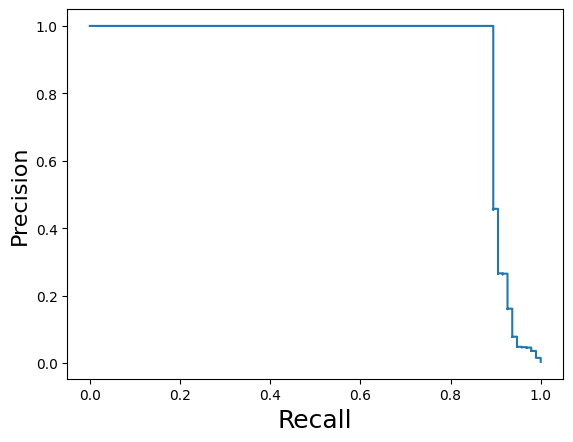

<Figure size 400x400 with 0 Axes>

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(df_train[df_train.columns[0:-1]],df_train[df_train.columns[-1]])
pred = lr.predict(df_test[df_test.columns[0:-1]])
y_score = lr.predict_proba(df_test[df_test.columns[0:-1]])[:,1]

precision, recall, _ = precision_recall_curve(df_test[df_test.columns[-1]],y_score)
auprc = average_precision_score(df_test[df_test.columns[-1]], y_score)

print(f'Accuracy for LR-classifier: {accuracy_score(pred,df_test[df_test.columns[-1]])}')
print(f'Precision for LR-classifier: {precision_score(pred,df_test[df_test.columns[-1]])}') 
print(f'Recall for LR-classifier: {recall_score(pred,df_test[df_test.columns[-1]])}') 
print(f'F1-score for LR-classifier: {f1_score(pred,df_test[df_test.columns[-1]])}')
print(auprc)
plt.step(recall, precision, where='post')
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=16)
plt.figure(figsize=(4,4))
plt.show()

In [ ]:
confusion_matrix(df_test[df_test.columns[-1]], pred, labels = [0, 1])

array([[29187,     1],
       [   10,    85]])

We checked the confusion matrix for the Logistic Tree model. Here, the first row represents positive and the second row represents negative. So we have 29187 as true positive and 10 false positive positives and 85 as fraud for the first data set. 

But the main question is...which is the best model? From observation between the three models we came to the conclusion that the Logistic Regression model had the highest AUPRC for this dataset, We feel KNN and Decision Tree struggled with tackling specific datapoints while Logistic Regression handled them better. Thus, from our results we came to the conclusion that Logistic Regression was the best model. 

## Part III - Clustering

For clustering, we used the dataset which have been reduced by dropping outliers twice. Class 0 has ben reduced to half its data points, which means that the dataset used for clustering contains 91188 data points. The This was done so the clustering algorithm didnt take to long to run. The runtime for the clustering methods can take a while.

In [27]:
#Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

1
2
3
4
5
6


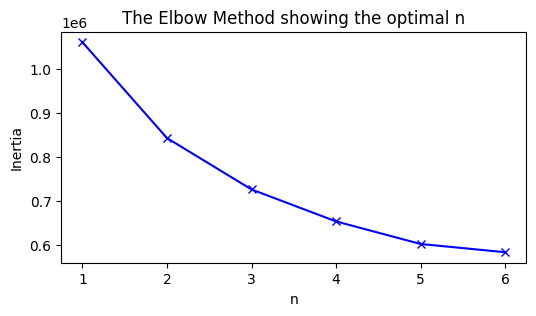

[0.8866647231245955, 0.15392217244011905, 0.15587218262235997, 0.1556808217742181, 0.15065646503693894]
[18542.089190009545, 16530.728169240978, 14899.428137000712, 13652.390766888759, 11731.479526020137]


In [19]:
N = range(1,7)
dist = []
inert = []
sil_score = []
CH_score = []
data = df.drop(['Class'],axis=1)
for n in N:
    kmeans = KMeans(n_clusters=n, random_state=0).fit(data)
    inert.append(kmeans.inertia_)
    labels = kmeans.labels_
    if n > 1:
        y_hat = kmeans.predict(data)
        CH_score.append(calinski_harabasz_score(data, labels))
        sil_score.append(silhouette_score(data, labels, metric = 'euclidean'))
    print(n) #printing just to see that it runs

plt.figure(figsize=(6,3))
plt.plot(N, inert, 'bx-')
plt.xlabel('n')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal n')
plt.show()
print(sil_score)
print(CH_score)

From the elbow method, its hard to see which number of clusters should be optimal for KMeans for the unbalanced data set. For the balanced data, it is clear from the elbow-plot that n = 2 is the best choice. Looking at the silhouette score as well as the Calinski-Harabasz index, we can see that a cluster size of 2 gives the highest scores. We decided to plot the clusters for n = 2 and compare it to the ground truth. 

/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

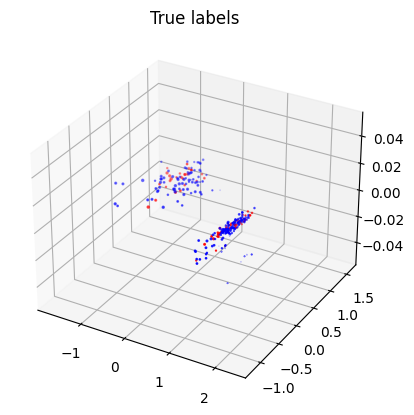

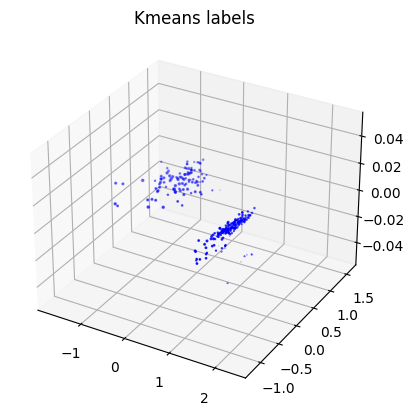

In [21]:
# KMeans with n_clusters = 2, since that was what we got from the silhouette and CH scores
PCAs = [0,1,2]

data = df.drop(['Class'],axis=1)
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
class0 = np.where(kmeans.labels_ == 0)
class1 = np.where(kmeans.labels_ == 1)

df_array = np.array(df)
true_class_0 = np.where(df_array[:,-1] == 0)
true_class_1 = np.where(df_array[:,-1] == 1)

sample0 = np.random.choice(len(np.array(true_class_0[0])),400)
sample1 = np.random.choice(len(np.array(true_class_1[0])),100)

samples = []
for i in range(len(sample0)):
    samples.append(sample0[i])
for i in range(len(sample1)):
    samples.append(sample1[i])

class0 = []
class1 = []
for i in range(len(samples)):
    if kmeans.labels_[samples[i]] == 0:
        class0.append(samples[i])
    else:
        class1.append(samples[i])


fig1 = plt.figure(1)
ax = fig1.add_subplot(projection='3d')
plt.title('True labels')
plt.scatter(df_array[sample0,PCAs[0]],df_array[sample0,PCAs[1]],df_array[sample0,PCAs[2]], color = 'blue')
plt.scatter(df_array[sample1,PCAs[0]],df_array[sample1,PCAs[1]],df_array[sample1,PCAs[2]], color = 'red')
fig1.show

fig2 = plt.figure(2)
ax = fig2.add_subplot(projection='3d')
plt.title('Kmeans labels')
plt.scatter(df_array[class0,PCAs[0]],df_array[class0,PCAs[1]],df_array[class0,PCAs[2]], color = 'blue')
plt.scatter(df_array[class1,PCAs[0]],df_array[class1,PCAs[1]],df_array[class1,PCAs[2]], color = 'red')
fig2.show

Plotting the result using the first 3 principal components, we can see that the result for Kmeans are pretty bad. This could also be seen at the silhouette score. We ran the model for 5 times, since Kmeans are randomly inisiated. We got the same result all times. We can see that the datapoints are seperet in 2 clusters, and that the model wants to seperate those. However, this is result does not match the ground truth.

In [ ]:
#DBSCAN
epsi = [0.2, 0.4, 0.6, 0.8, 1]
num_classes = []
CH_scores = []
sil_scores = []
n_outliers = []
all_labels = []
for eps in epsi: 

    clustering = DBSCAN(eps=eps, min_samples=100).fit(df)
    labels = clustering.labels_
    n_outliers.append(sum(labels == -1)) 
    num_classes.append(labels.max()+1)
    all_labels.append(labels)
    print(eps)

    CH_scores.append(calinski_harabasz_score(df, labels))
    sil_scores.append(silhouette_score(df, labels, metric = 'euclidean'))

print(CH_scores)
print(sil_scores)
print(num_classes)

0.2
0.4
0.6
0.8
1
[125.2257311414266, 214.45551297633426, 217.92566002729512, 241.7369948972352, 393.626002068827]
[-0.2884883249262077, -0.301765955125766, -0.25940302961391765, -0.2201344196301247, -0.13053816166886864]


89587
/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

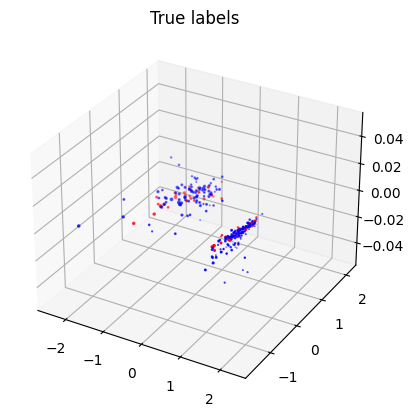

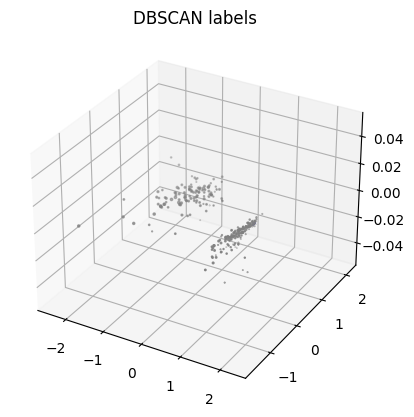

In [45]:
PCAs = [0,1,2]

data = df.drop(['Class'],axis=1)
DB = DBSCAN(eps=0.2, min_samples=100).fit(df)
class0 = np.where(DB.labels_ == 0)
class1 = np.where(DB.labels_ == 1)
outliers = np.where(DB.labels_ == -1)
print(len(outliers[0]))
df_array = np.array(df)
true_class_0 = np.where(df_array[:,-1] == 0)
true_class_1 = np.where(df_array[:,-1] == 1)

sample0 = np.random.choice(len(np.array(true_class_0[0])),400)
sample1 = np.random.choice(len(np.array(true_class_1[0])),100)

samples = []
for i in range(len(sample0)):
    samples.append(sample0[i])
for i in range(len(sample1)):
    samples.append(sample1[i])

class0 = []
class1 = []
classneg1 = []
for i in range(len(samples)):
    if DB.labels_[samples[i]] == 0:
        class0.append(samples[i])
    if DB.labels_[samples[i]] == 1:
        class1.append(samples[i])
    else: 
        classneg1.append(samples[i])


fig1 = plt.figure(1)
ax = fig1.add_subplot(projection='3d')
plt.title('True labels')
plt.scatter(df_array[sample0,PCAs[0]],df_array[sample0,PCAs[1]],df_array[sample0,PCAs[2]], color = 'blue')
plt.scatter(df_array[sample1,PCAs[0]],df_array[sample1,PCAs[1]],df_array[sample1,PCAs[2]], color = 'red')
fig1.show

fig2 = plt.figure(2)
ax = fig2.add_subplot(projection='3d')
plt.title('DBSCAN labels')
plt.scatter(df_array[class0,PCAs[0]],df_array[class0,PCAs[1]],df_array[class0,PCAs[2]], color = 'blue')
plt.scatter(df_array[class1,PCAs[0]],df_array[class1,PCAs[1]],df_array[class1,PCAs[2]], color = 'red')
plt.scatter(df_array[classneg1,PCAs[0]],df_array[classneg1,PCAs[1]],df_array[classneg1,PCAs[2]], color = 'grey')
fig2.show

### Conclusion

To conclude our notebook our results were enlightening because the Smote did not do that well and we think this is because of creating that many synthetical datapoint from so few values (the frauds) probably led to overfitting our classification models.  For the unbalanced dataset the classification models did a lot better than we expected them to do. Going strictly on the AUPRC score logistic regression worked best. To get a better result we could have downsampled the non frauds even more because of magnitude of non frauds that existed within the dataset, we felt if we were to downsample more it would have gotten more balanced results and easier for the models to classify them. 

For the clustering part, we clustered only the default data set where all outliers had been droped. The results from KMeans shows that the model understands that there are supposed to be only two classes, but it fails to seperate them correcly. For DBSCAN, the model detecs alot of outliers, which means that the datapoints are quite sparse. Rescaling som of the features could maybe lead to a better clustering result. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d1fe3dea-e2c4-4266-b20a-8be98a673e1c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>